In [1]:
%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
import corner
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode
import scipy.optimize as spo

In [2]:
def Prior(p):
    return np.piecewise( p, [p>= 0 and p <= 1, p<0 and p > 1], [lambda p: 1, lambda p:0] ) #Función a trozos

In [3]:
Prior = np.vectorize(Prior)

In [4]:
def Likelihood(p, r, n):
    return p**r*(1-p)**(n-r)

In [5]:
def Posterior(p, r, n):
    return Likelihood(p, r, n)*Prior(p)

In [6]:
def Neg_Posterior(p, r, n):
    return -Likelihood(p, r, n)*Prior(p)

In [7]:
def Metropolis(x0, Posterior, NSteps=int(1e5), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],r,n)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,r,n)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[10000:,:]

In [8]:
p = np.linspace(0,1,101)
r = 7
n = 10
Pos = Posterior(p, r, n)

In [9]:
initparams = np.array([0.2])
MCMC = Metropolis(initparams,Posterior)

100%|██████████| 99999/99999 [00:16<00:00, 6189.63it/s] 


In [10]:
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(r,n))
I

0.0007575757575757576

In [11]:
Normalized = Pos/I

<IPython.core.display.Javascript object>


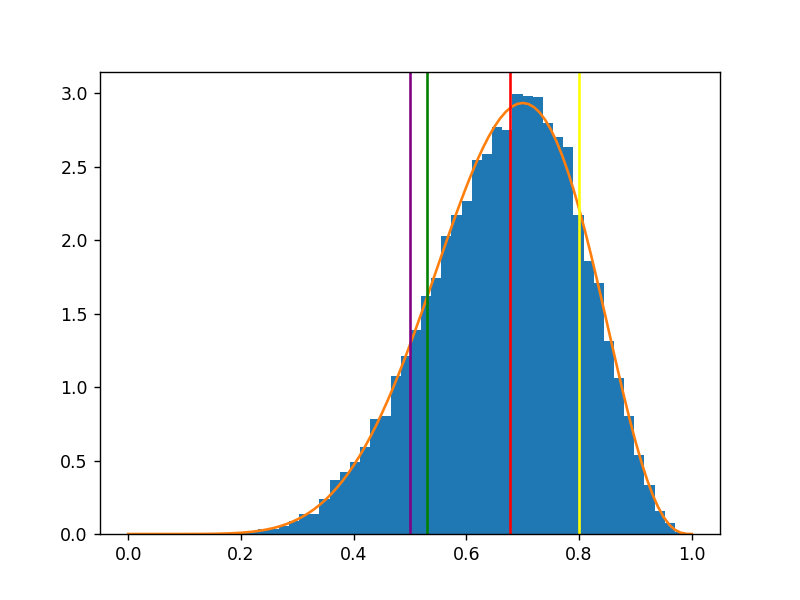

In [12]:
plt.hist(MCMC, density=True, bins = 50)
plt.plot(p, Normalized)

In [13]:
mediana = np.percentile(MCMC, 50)
plt.axvline(mediana, color = 'red')
mediana

0.6776600257259882

In [14]:
promedio = np.mean(MCMC)
promedio

0.666579018847525

In [15]:
maxi = spo.minimize( Neg_Posterior, 0.5, (7, 10), options={'disp':True}, method='Nelder-Mead' )

Optimization terminated successfully.
         Current function value: -0.002224
         Iterations: 13
         Function evaluations: 26


In [16]:
maxi.x

array([0.7])

Siguiendo el algorítmo de Metrópolis-Hastings, llegamos a un valor de 0.675 para el el punto donde se maximiza el posterior. Utilizando scipy.optimize, encontramos que este valor está en 0.7. Por tanto, podemos afirmar que p es aproximadamente 0.7, pues es muy probable que el algorimo de Metrópolis-Hastings esté convergiendo a un valor cercano.

In [17]:
liminf = np.percentile(MCMC, 16)
plt.axvline(liminf, color='green')
liminf

0.530875558315015

In [18]:
limsup = np.percentile(MCMC, 84)
plt.axvline(limsup, color='yellow')
limsup

0.7991626594871575

In [19]:
plt.axvline(0.5, color='purple')

In [21]:
std = np.std(MCMC)
std

0.13098184163512788

Dado que el valor del posterior esperado para una moneda justa (0.5) no se encuentra dentro del rango de +-$\sigma$ (ie entre el percentil 16 y el percentil 84), podemos afirmar que la moneda no es justa a un 68% de confianza.